# Simple Linear Regression

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## Reading the data

In [3]:
df=pd.read_csv("FuelConsumption.csv")
df.head()
df.head(10)
df["ENGINESIZE"].head()

0    2.0
1    2.4
2    1.5
3    3.5
4    3.5
Name: ENGINESIZE, dtype: float64

## summarize the data
df.describe()

## Let`s select some features to explore more

In [4]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


## We plot each of these features

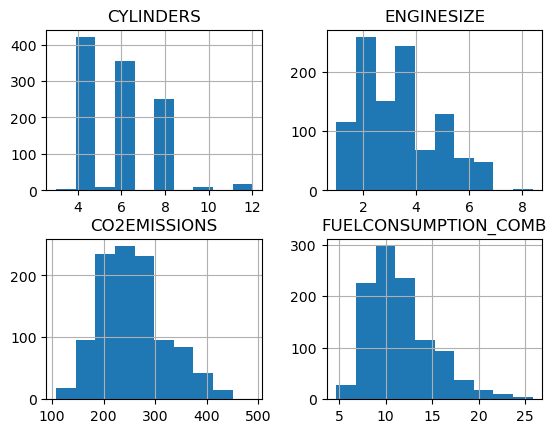

In [5]:
viz=cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist() #histogram
plt.show()

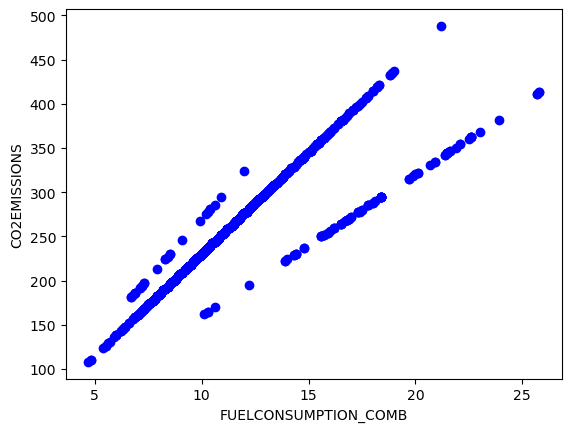

In [20]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

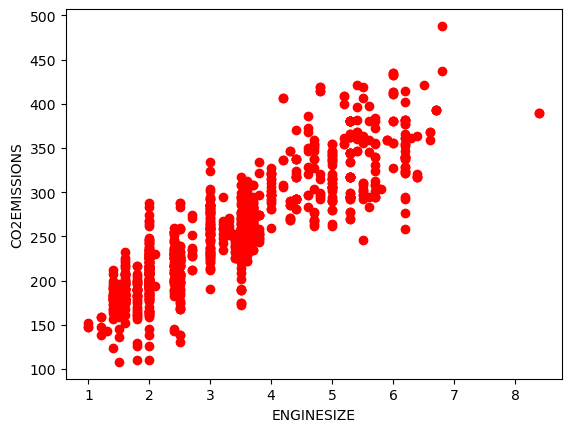

In [22]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

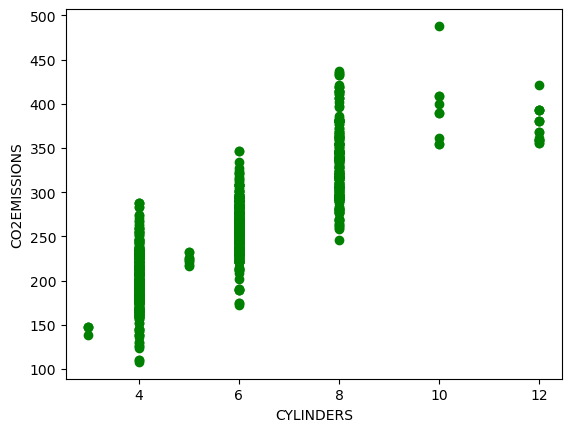

In [24]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='green')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

## We want to select the 80% data train and 20% data test
### so we use the msk

In [34]:
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]
print (msk)
print(~msk)
print(train)
print(test)

[ True  True  True ... False  True  True]
[False False False ...  True False False]
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5           196
1            2.4          4                   9.6           221
2            1.5          4                   5.9           136
3            3.5          6                  11.1           255
4            3.5          6                  10.6           244
...          ...        ...                   ...           ...
1061         3.2          6                  11.2           258
1062         3.0          6                  11.8           271
1063         3.2          6                  11.5           264
1065         3.2          6                  11.3           260
1066         3.2          6                  12.8           294

[852 rows x 4 columns]
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
21           2.0          4                   9.3           

# Simple Linear Regression model

In [30]:
# now we select the train data and test data
# so we plot both train and test data

In [ ]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

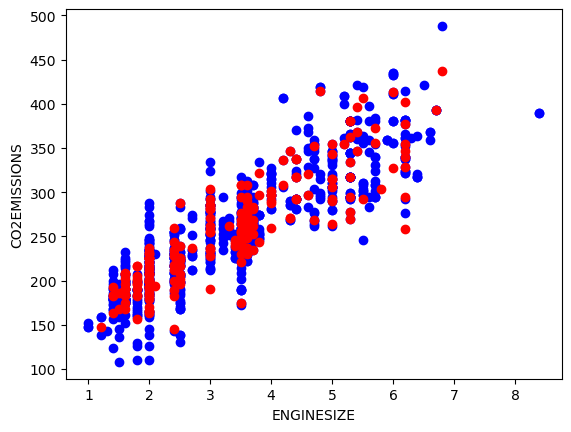

In [35]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue'  )
ax1.scatter(test.ENGINESIZE,test.CO2EMISSIONS,color='red'  )
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

## using Sklearn package to model data

In [45]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
#the coefficients : teta_0 and teta_1
print('Coefficients:',regr.coef_) #some coefficients
print('Intercept:',regr.intercept_) #just one

Coefficients: [[39.17262872]]
Intercept: [124.9408433]


Text(0, 0.5, 'CO2EMISSIONS')

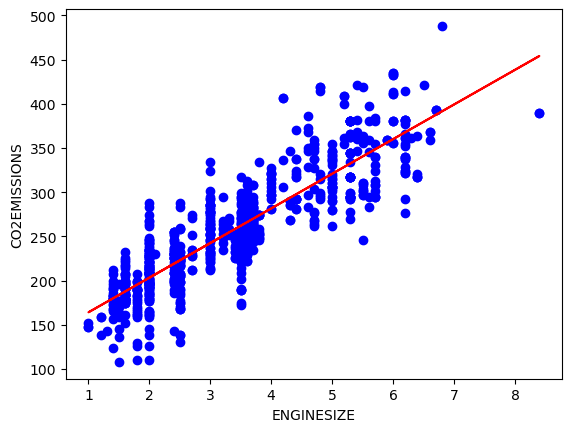

In [44]:
#plot the best line
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],'-r') #plt.plot(x,y,color) --> y=teta_0+teta_1x
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

# How is the error of this model?

In [57]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_=regr.predict(test_x) #not real test_y

print('mean absolute error: %.2f' % np.mean(np.absolute(test_y_-test_y)))
print('MSE: %.2f' %np.mean((test_y_-test_y)**2))
print('R2-score: %.2f' %r2_score(test_y,test_y_))

mean absolute error: 21.99
MSE: 831.49
R2-score: 0.77


In [ ]:
#R2 is near to 1. so not bad :)